**извлечение признаков из текста на естественном языке**

классификатор текстов HashingVectorizer

_Евгений Борисов <esborisov@sevsu.ru>_

## библиотеки

In [1]:
import re
# import gzip
import numpy as np
import numpy.random as rng
import pandas as pd
from tqdm.notebook import tqdm

np.set_printoptions(precision=2) # вывод на печать чисел до 2 знака
pd.options.display.max_colwidth = 200 

tqdm.pandas()

In [2]:
# import numpy as np
# import pandas as pd
# import re

In [3]:
from sklearn import __version__ as SKLEARN_VERSION

from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

SKLEARN_VERSION

'1.0.2'

## тексты

In [4]:
# загружаем тексты
data = pd.read_pickle('../data/text/news.pkl.gz')
print('записей:',len(data))
data.sample(5)

записей: 3196


,text,tag
217,"Во Львове покажут картину Микеланджело\nдекабря во Львове будет показана единственная на Украине графическая\nработа Микеланджело ""Ангел"", передает корреспондент ""Нового Региона""...",culture
1545,"Хищение 44 миллионов рублей выявили полицейские, проверяя законность траты бюджетных средств, выделенных на реконструкцию Государственного научного центра социальной и судебной психиатрии им. В.П....",incident
2311,"09:02 - 13.12.2016\n\nВ краевой больнице Хабаровска умерла женщина, получившая серьезные ожоги при взрыве газа в жилом доме, расположенном в городе Советская Гавань.\n\nДве другие женщины, которые...",incident
1868,"Дональд Трамп, избранный президент США, заявил, что оставит свой бизнес в срок до 20 января 2017 года, то есть до даты инаугурации, после чего сосредоточится на президентской работе.\n\nТакое реше...",politics
806,"""Вежливые люди"" 1939 года. История глазами стариков, переживших шесть властей\n\n5 декабря 2016 в 14:52\n\nTUT.BY\n\nЖурналист и писатель Василий Сарычев уже пятнадцать лет записывает воспоминания...",politics


## токенизация

In [5]:
from nltk.tokenize import sent_tokenize as nltk_sentence_split
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [6]:
def tokenize(text):
    return [ 
        t.lower()
        for s in nltk_sentence_split(text) # режем текст на отдельные предложения
        for t in nltk_tokenize_word(s) # разбиваем предложения на слова
    ]

data['text'].sample(10).progress_apply(tokenize).to_frame()

  0%|          | 0/10 [00:00<?, ?it/s]

,text
3020,"[москва, ,, 13, декабря, ., опубликован, список, пяти, седанов, ,, которые, не, станут, продаваться, в, россии, ., сообщается, ,, что, причинами, ,, по, которым, автомобили, выведены, с, российско..."
1037,"[``, как, дальше, жить, '', ., в, бресте, рабочая, спела, песню, о, жизни, без, зарплаты, 5, декабря, 2016, в, 15:54, tut.by, 29, ноября, в, интернете, появился, ролик, ,, на, котором, женщина, ,,..."
862,"[розы, —, баскову, ,, хризантемы, —, киркорову, ., кому, везли, цветы, зрители, самого, дорогого, концерта, года, 6, декабря, 2016, в, 14:39, софия, суденкова, /, фото, :, дмитрий, кожуро, ,, afis..."
1529,"[в, италии, сформировано, новое, правительство, москва, ., 12, декабря, ., interfax.ru, -, паоло, джентилони, объявил, в, понедельник, состав, нового, правительства, италии, ,, которое, ему, предс..."
895,"[квартира, для, мамы, ., как, в, ``, однушке, '', разместить, много, шкафов, 27, ноября, 2016, в, 9:32, houzze.ru, ,, екатерина, перминова, дизайнер, наталья, сытенкова, не, раз, сталкивалась, с, ..."
2826,"[роскомнадзор, разъяснил, на, своем, сайте, некоторые, положения, федерального, закона, «, о, новостных, агрегаторах, », ., как, заявили, в, ведомстве, ,, они, не, будут, принимать, меры, в, отнош..."
436,"[саакашвили, пообещал, уволить, половину, чиновников, в, случае, прихода, к, власти, в, украине, 8, декабря, 2016, в, 7:19, тасс, экс-глава, одесской, области, михаил, саакашвили, заявил, ,, что, ..."
2832,"[на, сайте, роскомнадзора, опубликованы, разъяснения, по, вопросу, ответственности, новостных, агрегаторов, в, случае, распространения, ими, недостоверной, информации, ., в, документе, сказано, ,,..."
1558,"[в, течение, суток, сирийская, армия, достигла, новых, успехов, в, алеппо, —, от, боевиков, освобождено, ещё, пять, районов, города, ., таким, образом, ,, на, 96, процентов, территория, алеппо, на..."
2853,"[телеканал, «, пятница, », (, входит, в, холдинг, «, газпром-медиа, », ), сообщил, ,, что, подал, иск, о, защите, репутации, к, «, десяткам, », пользователей, социальной, сети, facebook, ., претен..."


## Vectorizer

In [7]:
tf = HashingVectorizer( n_features=4096, norm='l2', tokenizer=tokenize,token_pattern=None).fit( data['text'] )

## формируем датасеты

In [8]:
%%time 

X = tf.transform( data['text'] )
X.shape

CPU times: user 24.4 s, sys: 19.9 ms, total: 24.4 s
Wall time: 24.8 s


(3196, 4096)

In [9]:
labels = { t:i for i,t in enumerate(sorted(set(data['tag']))) }
labels

{'auto': 0,
 'culture': 1,
 'economics': 2,
 'health': 3,
 'incident': 4,
 'politics': 5,
 'realty': 6,
 'reclama': 7,
 'science': 8,
 'social': 9,
 'sport': 10,
 'tech': 11,
 'woman': 12}

In [10]:
y = data['tag'].map(labels).values
y

array([5, 1, 1, ..., 8, 5, 9])

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=326 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2237, 4096), (2237,), (959, 4096), (959,))

## обучаем классификатор

In [12]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge',max_iter=1000, tol=0.19)
clf.fit(X_train,y_train)

SGDClassifier(tol=0.19)

## тестируем

In [13]:
o = clf.predict(X_train)
accuracy_score(y_train,o)

0.9557443004023245

In [14]:
o = clf.predict(X_test)
accuracy_score(y_test,o)

0.794577685088634

In [15]:
print( classification_report(y_test,o) )

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        87
           1       0.78      0.64      0.71       101
           2       0.89      0.67      0.77        76
           3       0.88      0.48      0.62        31
           4       0.72      0.96      0.82       123
           5       0.83      0.92      0.87       177
           6       0.77      0.48      0.59        21
           7       0.70      0.82      0.76        17
           8       0.82      1.00      0.90        68
           9       0.85      0.25      0.39        44
          10       0.89      0.94      0.91       118
          11       0.58      0.79      0.67        89
          12       0.86      0.86      0.86         7

    accuracy                           0.79       959
   macro avg       0.81      0.73      0.75       959
weighted avg       0.81      0.79      0.78       959



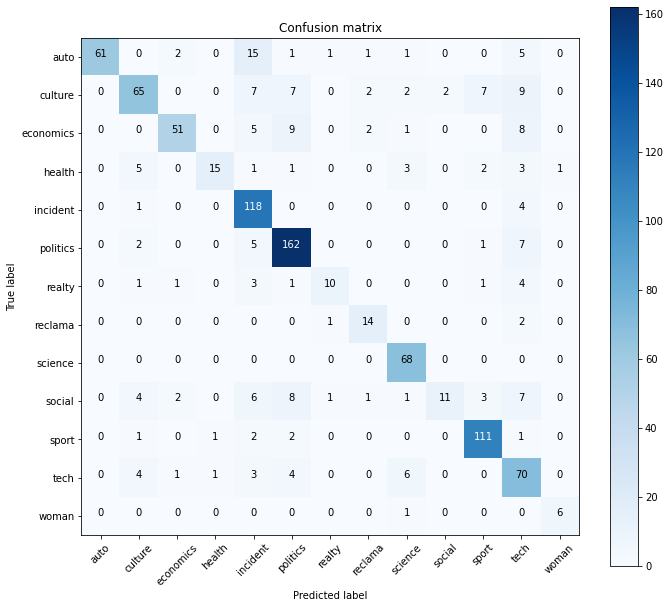

In [16]:
from matplotlib import pyplot as plt
import itertools

classes = sorted(labels.keys())
cm = confusion_matrix(y_test,o)
tick_marks = np.arange(len(classes))

plt.figure(figsize=(10,9))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.title('Confusion matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

plt.show()

---

In [17]:
o = clf.predict(X)

labels_inv = { labels[k]:k for k in labels }

for n in range(10):
    i = rng.randint(len(data))
    print('tag:',data.iloc[i,1])
    print('predict:',labels_inv[o[i]])
    print(re.sub(r'\n\s*\n',' ',data.iloc[i,0][:200])+'...')
    print('- - - - - - - - - - - - - - - - - -')
    

tag: incident
predict: incident
Фото: администрация Приморского края Тайфун Лайонрок, который обрушился на Приморье осенью 2016 года, причинил субъекту ущерб, превышающий сумму в 7 миллиардов рублей. Об этом сегодня, 13 декабря, в ...
- - - - - - - - - - - - - - - - - -
tag: sport
predict: sport
одержала победу надв рамках домашнего матча 16-го тура чемпионата Италии. Встреча, состоявшаяся в Риме на «Стадио Олимпико», завершилась в пользу команды Лучано Спаллетти со счетом 1:0. Автором един...
- - - - - - - - - - - - - - - - - -
tag: tech
predict: tech
Установлена причина поломки американского суперэсминца Zumwalt 2 декабря 2016 в 14:49 Денис Алдохин / 42.TUT.BY Эсминец USS Zumwalt (DDG-1000) завершил ремонтные работы на военно-морской станции СШ...
- - - - - - - - - - - - - - - - - -
tag: economics
predict: economics
Из-за Brexit пудинг к Рождеству 2016 года подорожал на 20% 29 ноября 2016 в 8:37 РБК Падение курса британского фунта стерлингов, последовавшее за победой на прошедшем в Б